LOCO, AT version
Execution time loading lattice: 0.0006499290466308594 sec


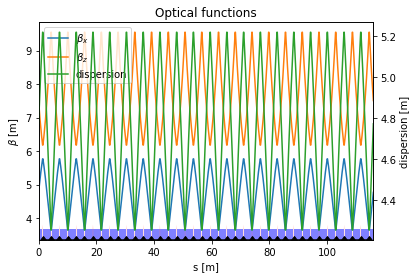

(<AxesSubplot:title={'center':'Optical functions'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:ylabel='dispersion [m]'>,
 <AxesSubplot:>)

In [1]:
print(f"LOCO, AT version")
from at import *
from pylab import *
from at.load import load_mat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from random import random
from copy import copy
from copy import deepcopy
from at import elements
from Lattice import *
from at_modules_loco import *
#from profiling_at_modules_loco import *

t0_fullCode =  time.time()
t0 = time.time()
ring=at.Lattice(ring1, energy=1)

t1 = time.time()
print(f"Execution time loading lattice: {t1-t0} sec")

#ring = at.load_mat('fccee_t_v22_b_c.mat', key='ring')
ring.radiation_off()
ring.plot_beta()

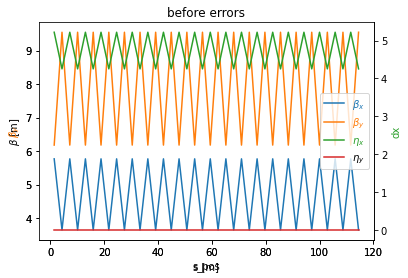

getOptics: 1.1965956687927246 sec


In [2]:
t0 = time.time()
BPMs_random_noise = 0.0
twiss = getOptics(ring, at.elements.Monitor, BPMs_random_noise )
make_plot_all2(twiss, 'before errors')

t1 = time.time()
print(f"getOptics: {t1-t0} sec")

In [3]:
#Turn sextuplets off
sext_indexes = get_refpts(ring,at.elements.Sextupole)
for i in sext_indexes:
    ring[i].H=ring[i].H*0
#Save quads strengths
quad_indexes = get_refpts(ring, elements.Quadrupole)
quad_strengths_before = np.array([ring[ind].K for ind in quad_indexes])
t0 = time.time()
print("Choose Used correctors")
correctors_indexes = get_refpts(ring, elements.Corrector)
print("Total number of Correctors: ", len(correctors_indexes))
correctors_names = [ring[ind].FamName for ind in correctors_indexes]
used_correctors = used_cor(1, correctors_names)
print("Number of used Correctors: ", len(used_correctors))
t1 = time.time()
print(f"Execution time choose correctors: {t1-t0} sec")

Choose Used correctors
Total number of Correctors:  40
Number of used Correctors:  40
Execution time choose correctors: 0.0007503032684326172 sec


In [4]:
print("Choose Used Quadrpoles Families")

t0 = time.time()

steps = 1 #use all quads individually
used_quadrpoles_families, used_quadrpoles_families_ind = used_quadrpoles(ring, steps)


t1 = time.time()
print(f"Execution time chose quadrpoles: {t1-t0} sec")

Choose Used Quadrpoles Families
# of QDG1: 0 # of QFG2: 0 # of QD1: 11 # of QF2: 2 # of QD3: 1 # of QF4: 1
used_qf 20
used_quadrpoles_families_ind:  40
Execution time chose quadrpoles: 0.004953145980834961 sec


In [5]:
# BPM_to_corrector_response_matrices (Model)

BPMs_random_noise = 0.0
t0 = time.time()
Cxx, Cxy= ORM_x(1.e-4, ring, BPMs_random_noise,used_correctors)
Cyy, Cyx= ORM_y(1.e-4, ring, BPMs_random_noise, used_correctors)
t1 = time.time()
print(f"Execution time ORMs: {t1-t0} sec")
print("orm dimensions: ", shape(Cxx))
print(norm(Cxy)) #check the coupling
print(norm(Cyx))
print(norm(Cxx))
print(norm(Cyy))

Execution time ORMs: 1.0193018913269043 sec
orm dimensions:  (40, 40)
0.0
0.0
625.0887917851788
112.6306497920948


In [6]:
dk =1.e-04

t0 = time.time()

C0x, C0y, C0xy, C0yx, dCx, dCy, dCxy,dCyx  = generatingQuadsResponse(ring, dk, Cxx, Cyy,Cxy, Cyx,BPMs_random_noise, used_quadrpoles_families_ind, CfamilyNames= used_correctors)

t1 = time.time()
print(f"Execution time generatingQuadsResponse: {t1-t0} sec")

generating response to family  1
Execution time: 1.104079246520996 sec
generating response to family  2
Execution time: 0.787010669708252 sec
generating response to family  3
Execution time: 0.8137147426605225 sec
generating response to family  4
Execution time: 0.7699060440063477 sec
generating response to family  5
Execution time: 0.7858288288116455 sec
generating response to family  6
Execution time: 0.7713353633880615 sec
generating response to family  7
Execution time: 0.8024594783782959 sec
generating response to family  8
Execution time: 0.8796145915985107 sec
generating response to family  9
Execution time: 0.7621228694915771 sec
generating response to family  10
Execution time: 0.7529516220092773 sec
generating response to family  11
Execution time: 0.8338615894317627 sec
generating response to family  12
Execution time: 0.8426830768585205 sec
generating response to family  13
Execution time: 0.7819185256958008 sec
generating response to family  14
Execution time: 0.7689456939

Execution time simulte erros: 0.0 sec


Text(0, 0.5, '$\\Delta K[m^-2]$')

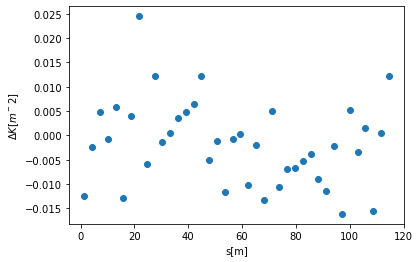

In [7]:
t0 = time.time()
gradErr = 5.e-3

simulateFixedGradientErrors(ring, gradErr, used_quadrpoles_families_ind)

t1 = time.time()
print(f"Execution time simulte erros: {t1-t0} sec")

#quads strengths after errors
quad_indexes = get_refpts(ring, elements.Quadrupole)
quad_strengths_after = np.array([ring[ind].K for ind in quad_indexes])
plt.scatter(twiss.s_pos, np.array(quad_strengths_before)- np.array(quad_strengths_after))
plt.xlabel("s[m]")
plt.ylabel("$\Delta K[m^-2]$")

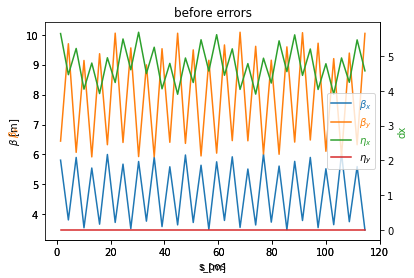

getOptics: 0.29923200607299805 sec


In [8]:
t0 = time.time()
BPMs_random_noise = 0.0
twiss_err = getOptics(ring, at.elements.Monitor, BPMs_random_noise )
make_plot_all2(twiss_err, 'before errors')

t1 = time.time()
print(f"getOptics: {t1-t0} sec")

In [9]:
#Measured orm

Cxx1, Cxy1= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
Cyy1, Cyx1= ORM_y(1.e-4, ring, BPMs_random_noise, used_correctors)

print(norm(Cxy)) #check the coupling
print(norm(Cyx))
print(norm(Cxx))
print(norm(Cyy))

0.0
0.0
625.0887917851788
112.6306497920948


iteration0:
Execution time define matrices function: 0.09979748725891113 sec
Execution time get inverse: 0.0019299983978271484 sec
Execution time set correction: 0.00045490264892578125 sec
beta beating with errors


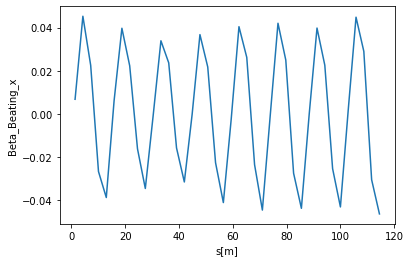

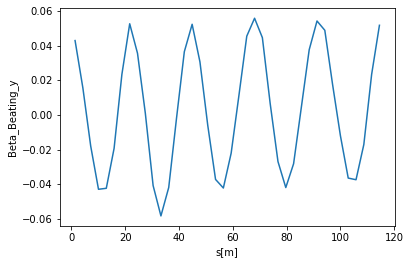

RMS beta beat, x:2.9904068779431467%   y: 3.5567839912752315%
STD beta beat, x:2.9901949563248413%   y: 3.544295775219692%
beta beating after corrections


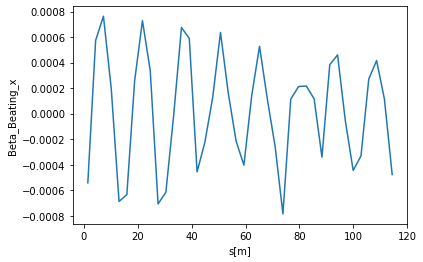

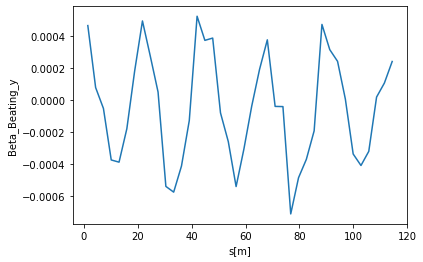

RMS beta beat, x:0.04422068085648425%   y: 0.03421304157389037%
STD beta beat, x:0.04415862646367764%   y: 0.03386712289286868%
betax_correction reduction 98.5212486908504
betax_correction reduction 99.03809054309131
iteration1:
Execution time define matrices function: 0.09773731231689453 sec
Execution time get inverse: 5.626678466796875e-05 sec
Execution time set correction: 0.0 sec
beta beating with errors


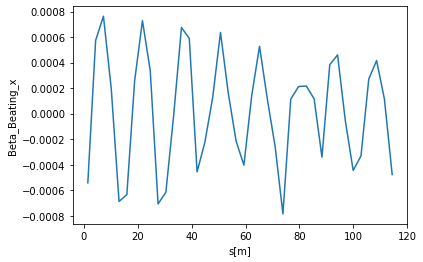

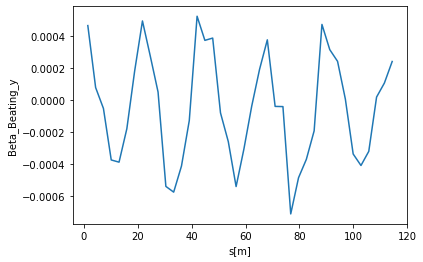

RMS beta beat, x:0.04422068085648425%   y: 0.03421304157389037%
STD beta beat, x:0.04415862646367764%   y: 0.03386712289286868%
beta beating after corrections


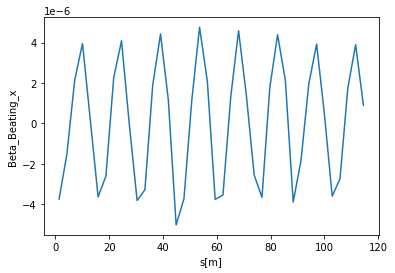

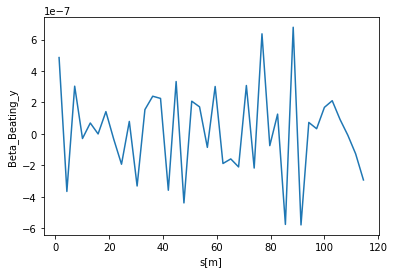

RMS beta beat, x:0.00030485387501159487%   y: 2.903449668450214e-05%
STD beta beat, x:0.0003047431202074006%   y: 2.897316642380209e-05%
betax_correction reduction 99.31060791216449
betax_correction reduction 99.91513617220558
iteration2:
Execution time define matrices function: 0.08379721641540527 sec
Execution time get inverse: 0.0009984970092773438 sec
Execution time set correction: 0.0 sec
beta beating with errors


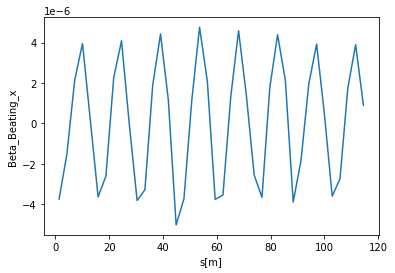

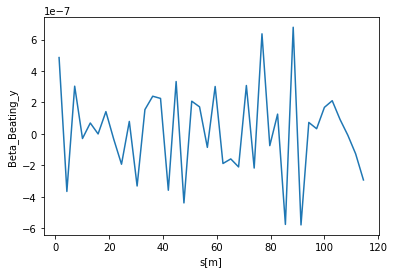

RMS beta beat, x:0.00030485387501159487%   y: 2.903449668450214e-05%
STD beta beat, x:0.0003047431202074006%   y: 2.897316642380209e-05%
beta beating after corrections


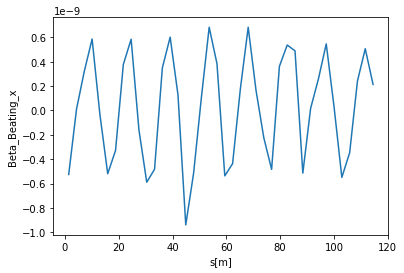

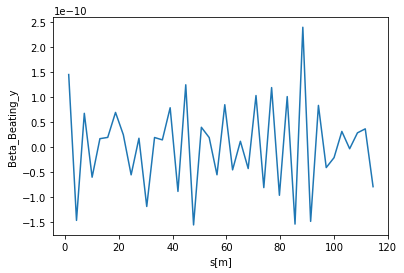

RMS beta beat, x:4.4204053892803064e-08%   y: 8.914867270037247e-09%
STD beta beat, x:4.410567637306792e-08%   y: 8.909949970027048e-09%
betax_correction reduction 99.98549992061243
betax_correction reduction 99.96929560251411
iteration3:
Execution time define matrices function: 0.09681415557861328 sec
Execution time get inverse: 0.0009250640869140625 sec
Execution time set correction: 0.0 sec
beta beating with errors


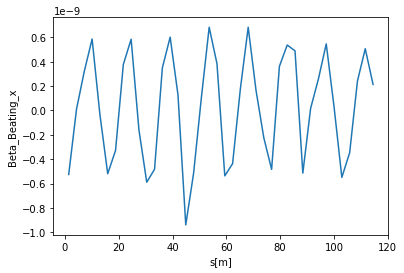

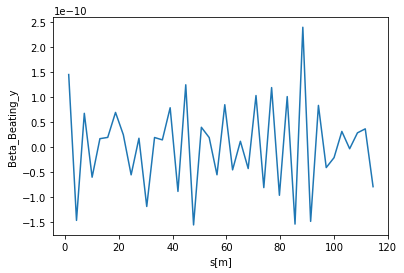

RMS beta beat, x:4.4204053892803064e-08%   y: 8.914867270037247e-09%
STD beta beat, x:4.410567637306792e-08%   y: 8.909949970027048e-09%
beta beating after corrections


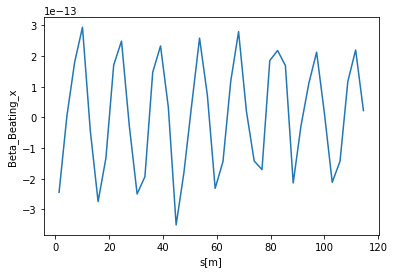

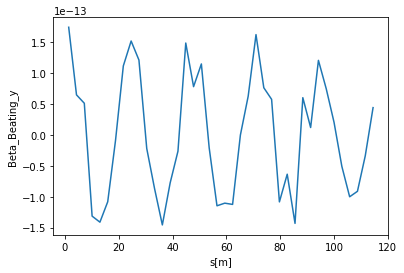

RMS beta beat, x:1.8216306397592552e-11%   y: 9.698930368542984e-12%
STD beta beat, x:1.818950405039485e-11%   y: 9.698914467978914e-12%
betax_correction reduction 99.95879041673018
betax_correction reduction 99.89120499414342
iteration4:
Execution time define matrices function: 0.09374785423278809 sec
Execution time get inverse: 0.0012252330780029297 sec
Execution time set correction: 0.0007696151733398438 sec
beta beating with errors


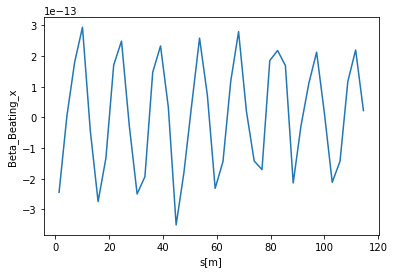

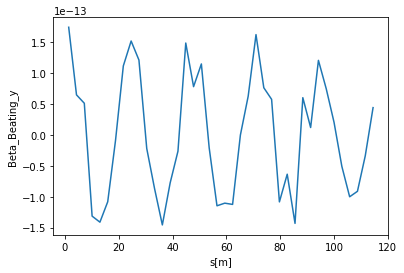

RMS beta beat, x:1.8216306397592552e-11%   y: 9.698930368542984e-12%
STD beta beat, x:1.818950405039485e-11%   y: 9.698914467978914e-12%
beta beating after corrections


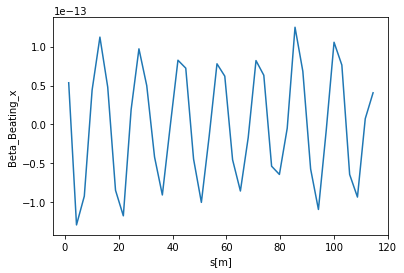

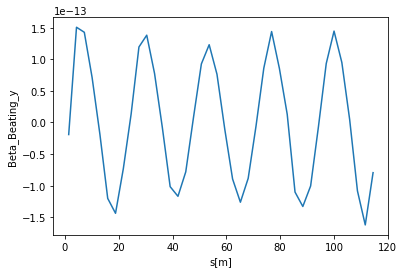

RMS beta beat, x:7.363843448363678e-12%   y: 9.731415355869261e-12%
STD beta beat, x:7.363343360916476e-12%   y: 9.731271584118204e-12%
betax_correction reduction 59.575540245980505
betax_correction reduction -0.33493371012989215


In [10]:
numberOfIteration = 5
for x in range(numberOfIteration):
    print('iteration'+str(x) +':')
    twiss_error0 = getOptics(ring, at.elements.Monitor, BPMs_random_noise)

    Cxx1, Cxy1= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy1, Cyx1= ORM_y(1.e-4, ring, BPMs_random_noise, used_correctors)

    t0 = time.time()
    A, B = defineMatrices(C0x, C0y, C0xy, C0yx, Cxx1, Cyy1, Cxy1, Cyx1, dCx, dCy, dCxy,dCyx)
    t1 = time.time()
    print(f"Execution time define matrices function: {t1-t0} sec")
    Nk = len(dCx)
    cut = 40
    t0 = time.time()
    r= getInverse(A, B,Nk, cut)
    t1 = time.time()
    print(f"Execution time get inverse: {t1-t0} sec")
    #print("r................", r)
    t0 = time.time()
    setCorrection(ring, r , used_quadrpoles_families_ind)
    t1 = time.time()
    print(f"Execution time set correction: {t1-t0} sec")
    twiss_corr = getOptics(ring, at.elements.Monitor, BPMs_random_noise)
    print('beta beating with errors')
    bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_error0)
    print('beta beating after corrections')
    bx_rms2, by_rms2= getBetaBeat(twiss, twiss_corr)
    print('betax_correction reduction', (1-bx_rms2/bx_rms1)*100)
    print('betax_correction reduction', (1-by_rms2/by_rms1)*100)
    #Cxx2, Cxy2= ORM_x(1.e-6, ring, BPMs_random_noise, CfamilyNames = used_correctors)
    #Cyy2, Cyx2= ORM_y(1.e-6, ring, BPMs_random_noise, CfamilyNames = used_correctors)

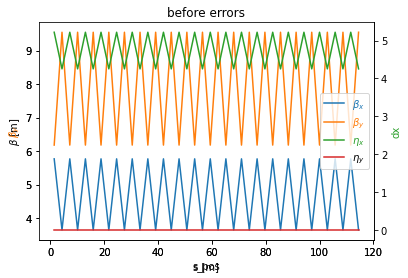

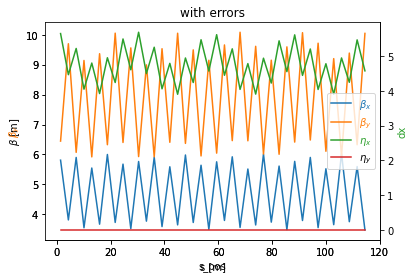

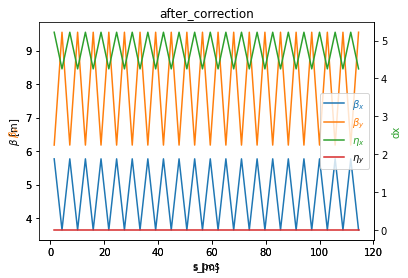

In [11]:
make_plot_all2(twiss, 'before errors')
make_plot_all2(twiss_err, 'with errors')
make_plot_all2(twiss_corr, 'after_correction')

In [14]:
t1_fullCode = time.time()
print(f"Execution time: {t1_fullCode-t0_fullCode} sec")

Execution time: 57.71116232872009 sec
